## CNN
1. Load mnist dataset
2. Normalize the dataset
3. Convert and to categorical
4. Create of model
5. Compile the model
6. Model Training
7. Evaluate the model
8. Predict an image


In [1]:
import keras
import numpy as np
from keras.models import Model
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Input,Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from Dataset import DataSetBacteria
from matplotlib import pyplot as plt
from keras.callbacks import TensorBoard
import time,os
%matplotlib inline


Using TensorFlow backend.


### Load dataset

In [2]:
w = 330
h = 330
c = 3

#train = DataSetBacteria()
#train.load('dataset/train_qtd_classes(28).npz',True)
#x_train,y_train = train.getDataSet()
#x_train = np.float32(x_train)
#x_train = x_train/255

#test = DataSetBacteria()
#test.load('dataset/test_qtd_classes(28).npz',True)
#x_test, y_test = test.getDataSet()
#x_test = np.float32(x_test)
#x_test = x_test/255

ev = DataSetBacteria()
ev.load('dataset/eval_qtd_classes(28).npz',True)
x_ev, y_ev = ev.getDataSet()
x_ev = np.float32(x_ev)
x_ev = x_ev/255

ev_classes = ev.getClasses()

n_classes =len(ev_classes)

#plt.imshow(x_train[2])

(1400, 330, 330, 3)
(1400,)
['eval\\AcinetobacterBaumanii', 'eval\\BacteroidesFragilis', 'eval\\CandidaAlbicans', 'eval\\ClostridiumPerfringens', 'eval\\EnterococcusFaecalis', 'eval\\EnterococcusFaecium', 'eval\\EscherichiaColi', 'eval\\LactobacillusCasei', 'eval\\LactobacillusCrispatus', 'eval\\LactobacillusDelbrueckii', 'eval\\LactobacillusGasseri', 'eval\\LactobacillusJehnsenii', 'eval\\LactobacillusJohnsonii', 'eval\\LactobacillusParacasei', 'eval\\LactobacillusPlantarum', 'eval\\LactobacillusReuteri', 'eval\\LactobacillusRhamnosus', 'eval\\LactobacillusSalivarius', 'eval\\MicrococcusSpp', 'eval\\NeisseriaGonorrhoeae', 'eval\\PorfyromonasGingivalis', 'eval\\PropionibacteriumAcnes', 'eval\\Proteus', 'eval\\PseudomonasAeruginosa', 'eval\\StaphylococcusAureus', 'eval\\StaphylococcusEpidermidis', 'eval\\StreptococcusAgalactiae', 'eval\\naoBacteria']


### To Categorical
Before

In [3]:
#y_train[0:3]

After

In [4]:
#y_train = keras.utils.to_categorical(y_train)
#y_test = keras.utils.to_categorical(y_test)
y_ev = keras.utils.to_categorical(y_ev)

#y_train[0:3]

### Model

In [5]:
from Models import rocket

model,model_label = rocket(w,h,c,n_classes)

print("Model:" + model_label)

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
------------------------------------------------------------------------------
rocket
------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input1 (InputLayer)          (None, 330, 330, 3)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 330, 330, 32)      896       
_________________________________________________________________
Conv2 (Conv2D)               (None, 330, 330, 32)      9248      
_________________________________________________________________
pooling1 (MaxPooling2D)      (None, 165, 165, 32)      0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 165, 165, 64)      

In [6]:
opt = Adam(lr=0.0001,decay=0.1e-6)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

### Load Weights

In [7]:
try:
    model.load_weights(filepath='pesos_rocket/peso_rocket.30-0.593.hdf5'.format(model_label))
    print("Loaded")
except Exception as ex:    
    print(ex)








Loaded


### Train

if filepath is 'weights.{epoch:02d}-{val_loss:.2f}.hdf5', for each epoch, one file will be created

In [8]:
dir_pesos = 'pesos/'
if not os.path.exists(dir_pesos):
    os.mkdir(dir_pesos)

tensorboard = TensorBoard(log_dir="tensorborad//{}".format(time.time()))
checkpoint = ModelCheckpoint(filepath=dir_pesos+'/peso_'+model_label +'.{epoch:02d}-{val_loss:.3f}.hdf5',monitor='val_acc',verbose=1,mode = 'max')

#model.fit(x=x_train,y=y_train,batch_size=90,epochs=25,validation_data=(x_test,y_test),callbacks=[checkpoint,tensorboard])

### Evaluate the model

In [9]:
ev = model.evaluate(x=x_ev,y=y_ev)
print('loss:\t',ev[0])
print('acc:\t',ev[1])

1400/1400 [==============================] - 8s 6ms/step
loss:	 0.7169889083930424
acc:	 0.8885714289120266


### Predicting an image

In [10]:
def predict():    
    result = []
    for i in range(0,len(x_ev)):
        img = x_ev[i]
        shape = [1,img.shape[0],img.shape[1],3]
        img = img.reshape(shape)
        pred = model.predict(img)
        num = np.argmax(pred)
        result.append(num)
    return (result)

In [11]:
#for i in range(25,40):
#    img = x_test[i]
#    number,percent,c = predict(img)
#    plt.figure()
#    plt.title(" Number:{n}\n{p}%".format(n=c,p=percent))
#    plt.imshow(img.reshape(383,512,3))

### Other tests

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
y_pred = predict()

print(classification_report(np.argmax(y_ev,axis=1), y_pred))
conf = confusion_matrix(np.argmax(y_ev,axis=1), y_pred)
print(conf)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.76      0.96      0.85        50
           2       1.00      1.00      1.00        50
           3       0.86      1.00      0.93        50
           4       0.93      0.84      0.88        50
           5       0.80      0.90      0.85        50
           6       0.89      1.00      0.94        50
           7       0.94      0.98      0.96        50
           8       0.95      0.42      0.58        50
           9       1.00      0.02      0.04        50
          10       0.79      1.00      0.88        50
          11       0.84      0.92      0.88        50
          12       0.82      1.00      0.90        50
          13       0.94      0.94      0.94        50
          14       0.98      1.00      0.99        50
          15       0.68      1.00      0.81        50
          16       0.94      1.00      0.97        50
          17       1.00    

In [14]:
ev_classes[9]

'eval\\LactobacillusDelbrueckii'

In [88]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    txtcolor=["black","white"]
    
    threshold = im.norm(data.max())/2.
    
    for i in range(len(row_labels)):
        for j in range(len(col_labels)):
            text = ax.text(j, i, data[i, j],ha="center", va="center", color=txtcolor[int(im.norm(data[i, j]) > threshold)])

    return im, cbar


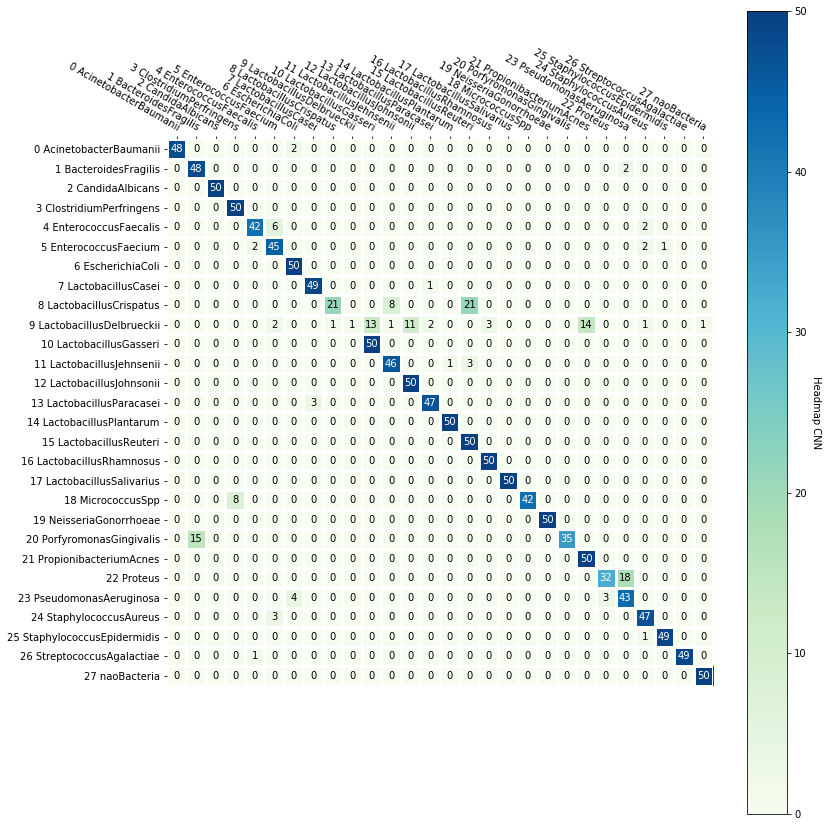

In [100]:
cls =[]

for i in range(len(ev_classes)):
    c = ev_classes[i]
    cls.append("{} {}".format(i,c.split("\\")[-1]))
    
plt.rcParams["figure.figsize"] = (12,12)

fig, ax = plt.subplots()

im, cbar = heatmap(conf,cls, cls, ax=ax,cmap="GnBu", cbarlabel="Headmap CNN")

fig.tight_layout()
plt.show()